# Project Work House Rent Prediction In New Delhi , Name - Ashish Pratap Dwivedi

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Data Set

In [221]:
df = pd.read_csv(r"C:\Data Analysis Course DU\Projects\Data Analytics Project work\makaan_data.csv")

In [222]:
#Check the head of DataSet

df.head()

,Sr No,Size,Size_unit,Property_type,Location,Seller_name,Seller_type,Rent_price,Area_sqft,Status,Security_deposit,Bathroom,Facing_direction
0,0,2,BHK,Independent Floor,Uttam Nagar,seller,Verified Owner,"8,500",500,Semi-Furnished,No,1.0,NorthWest
1,1,3,BHK,Independent House,Model Town,seller,Verified Owner,"48,000",1020,Furnished,No,3.0,South
2,2,2,BHK,Apartment,Sector 13 Rohini,seller,Verified Owner,"20,000",810,Unfurnished,No,2.0,NaN
3,3,3,BHK,Apartment,DLF Farms,seller,Verified Owner,"11,000",750,Semi-Furnished,No,1.0,NaN
4,4,3,BHK,Independent Floor,laxmi nagar,seller,Verified Owner,"20,000",1300,Furnished,No,2.0,NaN


### Data Cleaning and Processing

In [224]:
#Dropping  the Columns
house = df.drop(columns=["Sr No","Seller_name","Security_deposit"])
house.shape

(14000, 10)

In [225]:
# print("--- Data Cleaning and Preprocessing ---")
# # 1. Get the initial number of rows
# initial_rows = house.shape[0]
# # 2. Drop duplicate rows
# house.drop_duplicates(inplace=True)
# # 3. Print information about dropped duplicates
# print(f"\nDropped {initial_rows - house.shape[0]} duplicate rows.")
# print(f"Shape after dropping duplicates: {house.shape}")
# # Identify duplicates
# # duplicates = df.duplicated()

# # Count the number of duplicate rows
# # duplicate_count = duplicates.sum()

# # print(f"Number of duplicate rows: {duplicate_count}")


In [226]:
house.shape

(14000, 10)

In [227]:
# Data Checking
print("INFO of Data :")
print(house.info())

print("\n")
#decsribe the data
print("Describe the Data :")
print(house.describe())

print("\n")

print("Decsribe the data including Object :")
print(house.describe(include="object"))

print("\n")
#Checking Unique Value from Each Column

print("Unique value of Each Column :")
for col in house.columns:
    print(f"-{col}: {house[col].nunique()}")

INFO of Data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Size              14000 non-null  int64  
 1   Size_unit         14000 non-null  object 
 2   Property_type     14000 non-null  object 
 3   Location          14000 non-null  object 
 4   Seller_type       14000 non-null  object 
 5   Rent_price        14000 non-null  object 
 6   Area_sqft         14000 non-null  int64  
 7   Status            14000 non-null  object 
 8   Bathroom          6217 non-null   float64
 9   Facing_direction  2924 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.1+ MB
None


Describe the Data :
               Size     Area_sqft     Bathroom
count  14000.000000  14000.000000  6217.000000
mean       3.106643   3116.115571     2.193663
std        1.155827   2255.780445     0.964027
min        0.000000    150.000000  

### Cleaning the Size of house

In [229]:
print(F"Sum of house size = 0 : {(house["Size"]==0).sum()}")

Sum of house size = 0 : 4


In [230]:
##### Removing rows where the 'Size' column has a value of 0, as such entries are likely invalid or uninformative
initial_rows = house.shape[0]
print("Initial row count:", initial_rows)

# Filter out rows with Size = 0
house = house[house['Size'] != 0]

# Calculate and display the number of rows removed
rows_removed = initial_rows - house.shape[0]
print("Number of rows removed due to Size = 0:", rows_removed)


Initial row count: 14000
Number of rows removed due to Size = 0: 4


In [231]:
#checkign the shape of data
house.shape

(13996, 10)

### Cleaning the  House Rent Price

In [233]:
# Function to convert price strings to numeric values
def convert_price_into_numeric(price_str):
    # Remove commas from the string
    price_str = str(price_str).replace(',', '').strip().upper()
    
    # If price is in lakhs (e.g., '15L'), convert it to a numeric value
    if 'L' in price_str:
        return float(price_str.replace('L', '')) * 100000
    
    # Otherwise, return the numeric value directly
    return float(price_str)

# Apply the function to the 'Rent_price' column
house['Rent_price'] = house['Rent_price'].apply(convert_price_into_numeric)

# Print first 5 converted prices for verification
print("First 5 converted rent prices:\n", house['Rent_price'].head())

    

First 5 converted rent prices:
 0     8500.0
1    48000.0
2    20000.0
3    11000.0
4    20000.0
Name: Rent_price, dtype: float64


### Cleanig the INFO

In [235]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13996 entries, 0 to 13999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Size              13996 non-null  int64  
 1   Size_unit         13996 non-null  object 
 2   Property_type     13996 non-null  object 
 3   Location          13996 non-null  object 
 4   Seller_type       13996 non-null  object 
 5   Rent_price        13996 non-null  float64
 6   Area_sqft         13996 non-null  int64  
 7   Status            13996 non-null  object 
 8   Bathroom          6216 non-null   float64
 9   Facing_direction  2921 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.2+ MB


### Handling the Missing Values

In [237]:
# Importing the KNN Imputer from scikit-learn
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

print("--- KNN Imputation for 'Bathroom' and related features ---")

# Selecting numerical features for KNN imputation (must be numeric and relevant)
num_features_for_knn = ['Bathroom', 'Area_sqft', 'Size']
print(f"Selected numerical features for KNN: {num_features_for_knn}")

# Creating a subset of the DataFrame with only the selected numerical columns
house_subset_knn = house[num_features_for_knn].copy()

# Storing original index and columns for use after imputation
original_index = house_subset_knn.index
original_columns = house_subset_knn.columns

# Scaling the data to normalize all features before KNN imputation
scaler = StandardScaler()
scaled_values_array = scaler.fit_transform(house_subset_knn)

# Creating a new DataFrame from the scaled values
house_scaled_for_knn = pd.DataFrame(scaled_values_array, columns=original_columns, index=original_index)
print("\nSample of scaled data before KNN imputation:")
print(house_scaled_for_knn.head())

# Initializing KNNImputer with 5 neighbors and fitting it to the scaled data
knn_imputer = KNNImputer(n_neighbors=11)
imputed_scaled_values_array = knn_imputer.fit_transform(house_scaled_for_knn)
print("\nSample of scaled and imputed data (NumPy array from KNNImputer):")
print(imputed_scaled_values_array[:5])

# Inversely transforming the imputed scaled data back to the original scale
imputed_original_scale_array = scaler.inverse_transform(imputed_scaled_values_array)

# Creating a DataFrame from the imputed data in original scale
house_imputed_original_scale = pd.DataFrame(imputed_original_scale_array, columns=original_columns, index=original_index)
print("\nSample of imputed data (back to original scale):")
print(house_imputed_original_scale.head())

# Updating the original DataFrame with the imputed values for the selected columns
for col in original_columns:
    house[col] = house_imputed_original_scale[col]

# Final print statements to verify update and confirm missing values are handled
print(f"\nOriginal DataFrame 'house' updated with KNN imputed values for columns: {original_columns}.")
print("Missing values count after KNN imputation for selected columns:")
print(house[num_features_for_knn].isnull().sum())


--- KNN Imputation for 'Bathroom' and related features ---
Selected numerical features for KNN: ['Bathroom', 'Area_sqft', 'Size']

Sample of scaled data before KNN imputation:
   Bathroom  Area_sqft      Size
0 -1.242059  -1.160012 -0.959103
1  0.840941  -0.929295 -0.093120
2 -0.200559  -1.022469 -0.959103
3 -1.242059  -1.049090 -0.093120
4 -0.200559  -0.805063 -0.093120

Sample of scaled and imputed data (NumPy array from KNNImputer):
[[-1.2420594  -1.16001191 -0.95910264]
 [ 0.84094107 -0.9292953  -0.09311976]
 [-0.20055917 -1.02246931 -0.95910264]
 [-1.2420594  -1.04909046 -0.09311976]
 [-0.20055917 -0.80506327 -0.09311976]]

Sample of imputed data (back to original scale):
   Bathroom  Area_sqft  Size
0       1.0      500.0   2.0
1       3.0     1020.0   3.0
2       2.0      810.0   2.0
3       1.0      750.0   3.0
4       2.0     1300.0   3.0

Original DataFrame 'house' updated with KNN imputed values for columns: Index(['Bathroom', 'Area_sqft', 'Size'], dtype='object').
Missing v

In [238]:
# This rounds bathroom values and converts them to integers
house['Bathroom'] = house['Bathroom'].round()

In [239]:
house.head()

,Size,Size_unit,Property_type,Location,Seller_type,Rent_price,Area_sqft,Status,Bathroom,Facing_direction
0,2.0,BHK,Independent Floor,Uttam Nagar,Verified Owner,8500.0,500.0,Semi-Furnished,1.0,NorthWest
1,3.0,BHK,Independent House,Model Town,Verified Owner,48000.0,1020.0,Furnished,3.0,South
2,2.0,BHK,Apartment,Sector 13 Rohini,Verified Owner,20000.0,810.0,Unfurnished,2.0,NaN
3,3.0,BHK,Apartment,DLF Farms,Verified Owner,11000.0,750.0,Semi-Furnished,1.0,NaN
4,3.0,BHK,Independent Floor,laxmi nagar,Verified Owner,20000.0,1300.0,Furnished,2.0,NaN


In [240]:
print(f"Handling 'Facing_direction' with {house['Facing_direction'].isnull().sum()} missing values ({house['Facing_direction'].isnull().mean()*100:.2f}%).")
    
fill_value = "Unknown"
house['Facing_direction'].fillna(fill_value, inplace=True)
    
print(f"Imputed 'Facing_direction' NaNs with '{fill_value}'.")
print(df['Facing_direction'].value_counts(dropna=False))

Handling 'Facing_direction' with 11075 missing values (79.13%).
Imputed 'Facing_direction' NaNs with 'Unknown'.
Facing_direction
NaN          11076
NorthEast      932
East           707
North          444
NorthWest      217
West           209
South          160
SouthEast      160
SouthWest       95
Name: count, dtype: int64


C:\Users\ashis\AppData\Local\Temp\ipykernel_21124\3137024577.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['Facing_direction'].fillna(fill_value, inplace=True)


In [241]:
print(house['Property_type'].value_counts())
wrong_value='ApartmentApartment' 
correct_value='Apartment'
house['Property_type']=house['Property_type'].replace(wrong_value, correct_value)
print(f"Replaced '{wrong_value}' with '{correct_value}' in 'Property_type'.")
print(house['Property_type'].value_counts())

Property_type
Independent Floor     9273
Apartment             2092
Villa                 1366
Independent House      824
Studio Apartment       373
Penthouse               67
ApartmentApartment       1
Name: count, dtype: int64
Replaced 'ApartmentApartment' with 'Apartment' in 'Property_type'.
Property_type
Independent Floor    9273
Apartment            2093
Villa                1366
Independent House     824
Studio Apartment      373
Penthouse              67
Name: count, dtype: int64


In [242]:
# Creating the Pivot Table for Facing Direction

pivot = pd.pivot_table(data = house, index = 'Facing_direction', values = 'Size', aggfunc = 'count')

pivot

,Size
Facing_direction,
East,707
North,444
NorthEast,931
NorthWest,215
South,160
SouthEast,160
SouthWest,95
Unknown,11075
West,209


In [243]:
print(df['Size_unit'].value_counts())
wrong_value='BHKBHK' 
correct_value='BHK'
df['Size_unit']=df['Size_unit'].replace(wrong_value, correct_value)
print(f"Replaced '{wrong_value}' with '{correct_value}' in 'Size_unit'.")
print(df['Size_unit'].value_counts())

Size_unit
BHK       13621
RK          373
BHKBHK        6
Name: count, dtype: int64
Replaced 'BHKBHK' with 'BHK' in 'Size_unit'.
Size_unit
BHK    13627
RK       373
Name: count, dtype: int64


## Exploratory Data Analysis

--- III. Exploratory Data Analysis (EDA) ---

Analyzing target variable 'Rent_price':


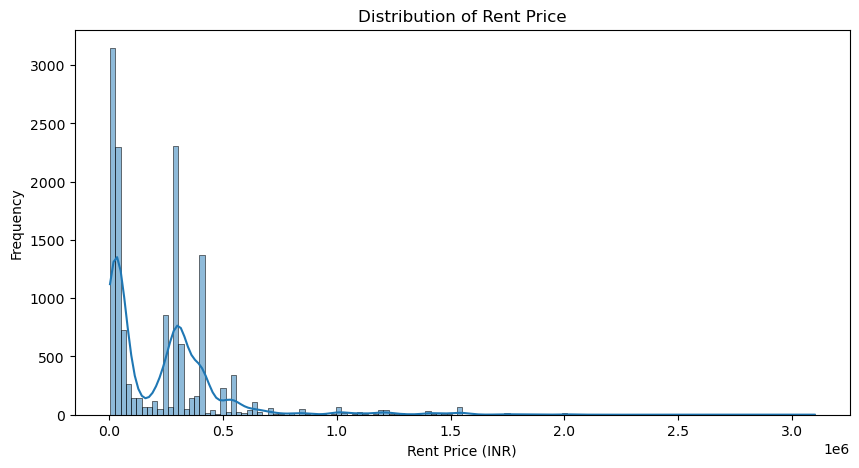

Rent Price Skewness: 2.93

Analyzing 'Area_sqft':


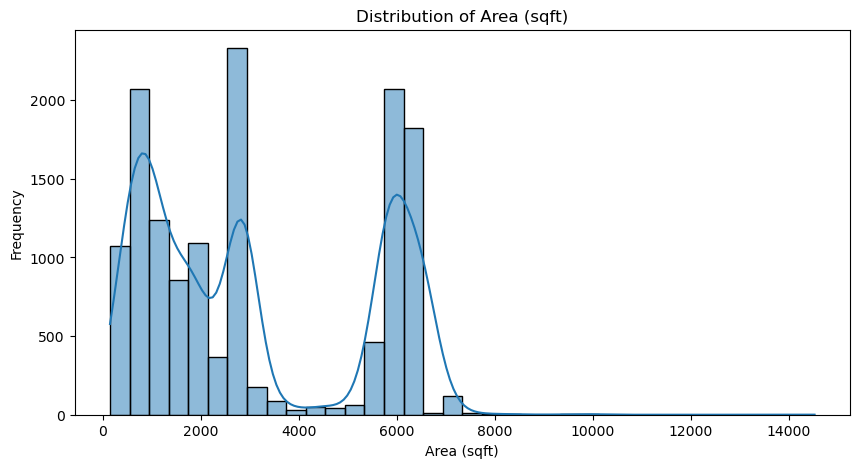


Analyzing 'Bathroom' counts:


C:\Users\ashis\AppData\Local\Temp\ipykernel_21124\2400713270.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Bathroom', data=house, palette='viridis')


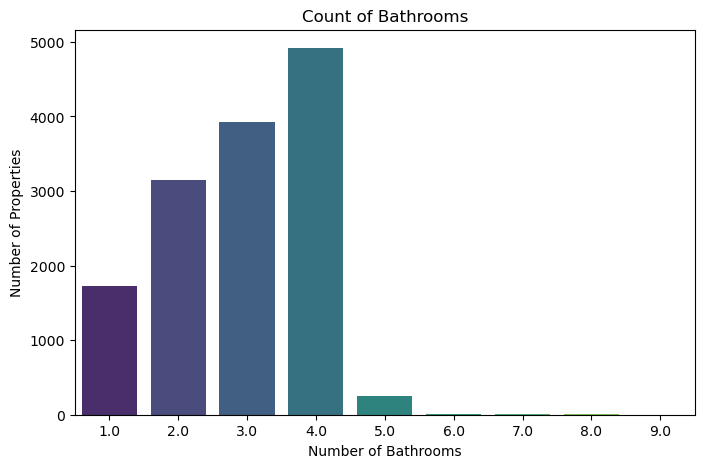


Analyzing 'Property_type':


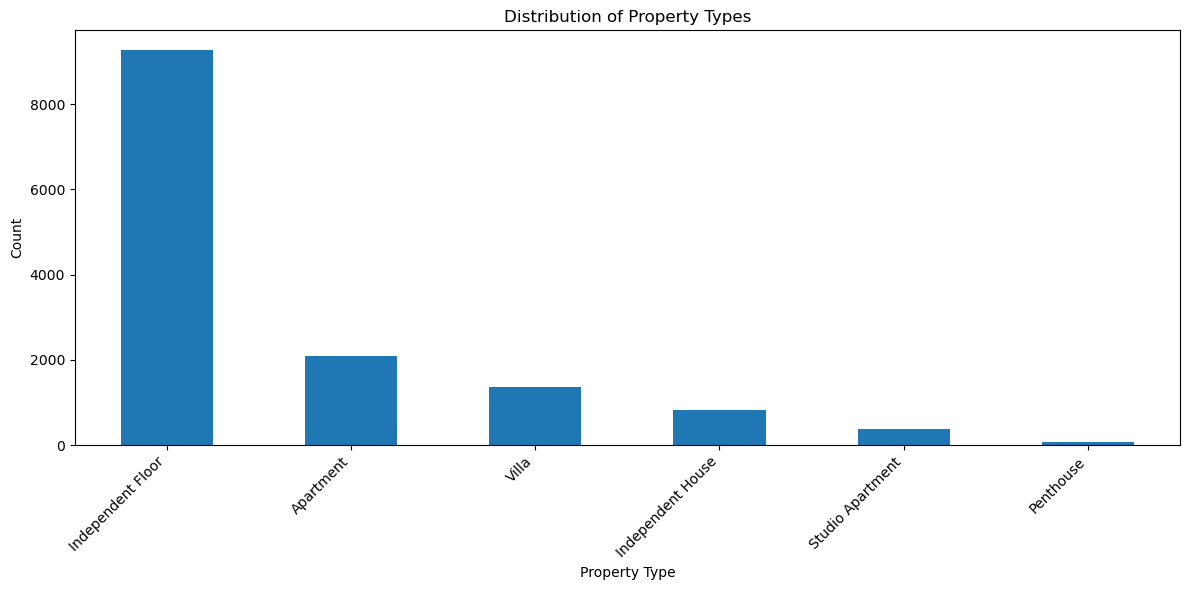


Rent Price vs. Area_sqft:


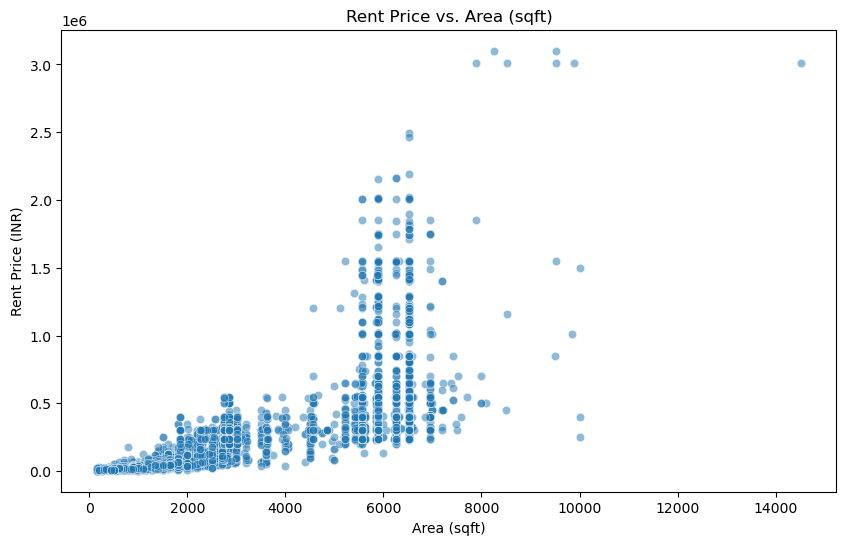


Rent Price by Property Type:


C:\Users\ashis\AppData\Local\Temp\ipykernel_21124\2400713270.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Property_type', y='Rent_price', data=house, palette='Set2')


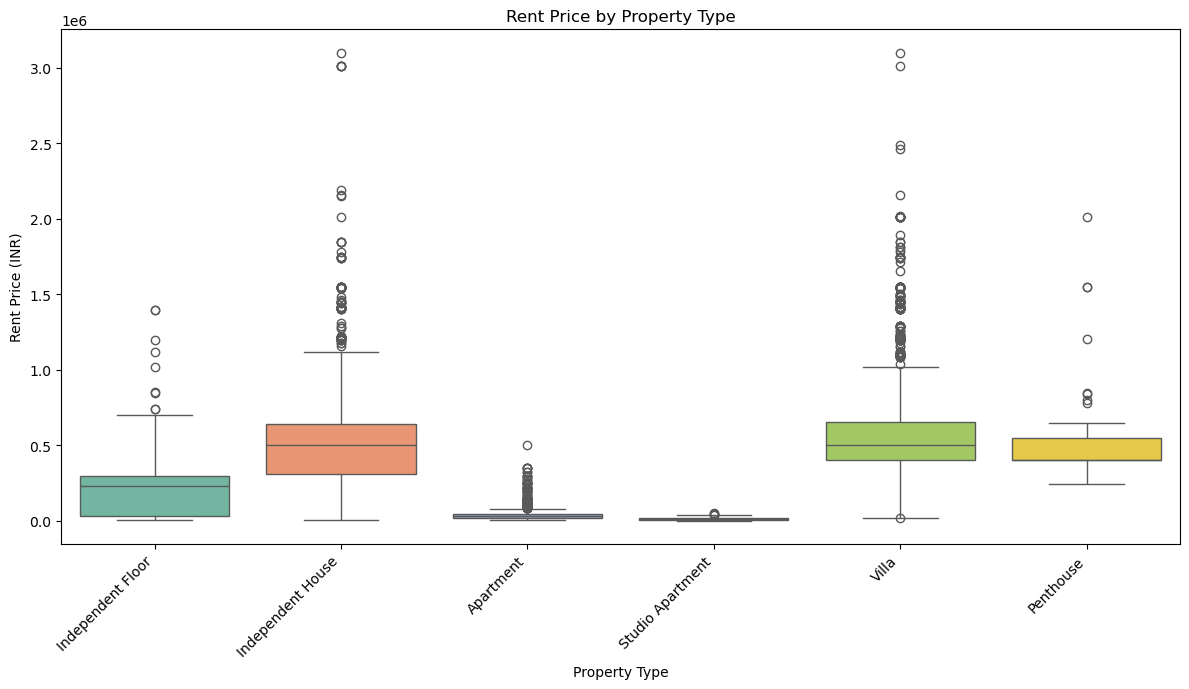


Rent Price by Number of Bathrooms:


C:\Users\ashis\AppData\Local\Temp\ipykernel_21124\2400713270.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Bathroom', y='Rent_price', data=house, palette='coolwarm')


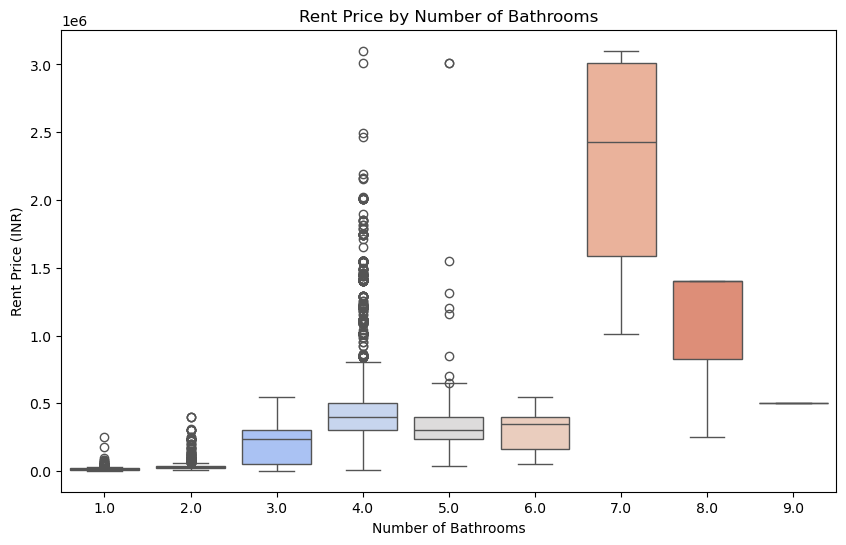


Performing Correlation Analysis:


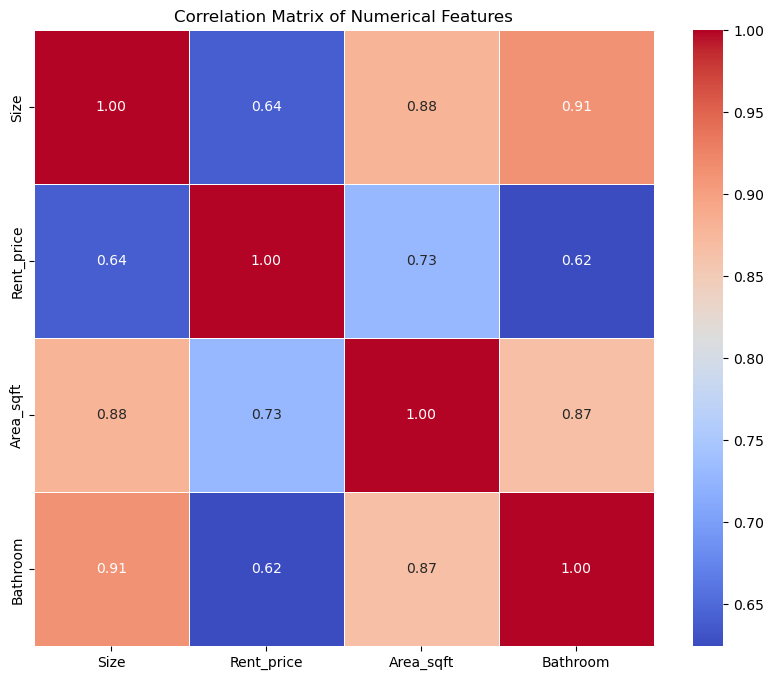


EDA complete. Review plots and statistics for insights.


In [245]:
# Step III: Exploratory Data Analysis (EDA)
print("--- III. Exploratory Data Analysis (EDA) ---")

# ----------------------------------------------
# 1. Univariate Analysis (Distribution of individual features)
# ----------------------------------------------

# Distribution of Rent Price
print("\nAnalyzing target variable 'Rent_price':")
plt.figure(figsize=(10, 5))
sns.histplot(house['Rent_price'], kde=True)
plt.title('Distribution of Rent Price')
plt.xlabel('Rent Price (INR)')
plt.ylabel('Frequency')
plt.show()

# Checking skewness to decide on transformation if needed
print(f"Rent Price Skewness: {house['Rent_price'].skew():.2f}")
# If highly skewed, consider: house['Rent_price_log'] = np.log1p(house['Rent_price'])

# Distribution of Area (sqft)
print("\nAnalyzing 'Area_sqft':")
plt.figure(figsize=(10, 5))
sns.histplot(house['Area_sqft'], kde=True)
plt.title('Distribution of Area (sqft)')
plt.xlabel('Area (sqft)')
plt.ylabel('Frequency')
plt.show()

# Count of Bathrooms
print("\nAnalyzing 'Bathroom' counts:")
plt.figure(figsize=(8, 5))
sns.countplot(x='Bathroom', data=house, palette='viridis')
plt.title('Count of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Properties')
plt.show()

# Count of Property Types
print("\nAnalyzing 'Property_type':")
plt.figure(figsize=(12, 6))
house['Property_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ----------------------------------------------
# 2. Bivariate Analysis (Relationships between two variables)
# ----------------------------------------------

# Scatter plot of Rent Price vs. Area
print("\nRent Price vs. Area_sqft:")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area_sqft', y='Rent_price', data=house, alpha=0.5)
plt.title('Rent Price vs. Area (sqft)')
plt.xlabel('Area (sqft)')
plt.ylabel('Rent Price (INR)')
plt.show()

# Rent Price across Property Types using Boxplot
print("\nRent Price by Property Type:")
plt.figure(figsize=(12, 7))
sns.boxplot(x='Property_type', y='Rent_price', data=house, palette='Set2')
plt.title('Rent Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Rent Price (INR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Rent Price across Bathroom counts using Boxplot
print("\nRent Price by Number of Bathrooms:")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bathroom', y='Rent_price', data=house, palette='coolwarm')
plt.title('Rent Price by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Rent Price (INR)')
plt.show()

# ----------------------------------------------
# 3. Correlation Analysis (Numerical Features Only)
# ----------------------------------------------

# Heatmap to visualize correlation between numerical variables
print("\nPerforming Correlation Analysis:")
numerical_df = house.select_dtypes(include=np.number)
plt.figure(figsize=(10, 8))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("\nEDA complete. Review plots and statistics for insights.")



In [246]:
# Save a copy of the EDA-processed data
house_cleaned = house.copy()

house_cleaned.head()

,Size,Size_unit,Property_type,Location,Seller_type,Rent_price,Area_sqft,Status,Bathroom,Facing_direction
0,2.0,BHK,Independent Floor,Uttam Nagar,Verified Owner,8500.0,500.0,Semi-Furnished,1.0,NorthWest
1,3.0,BHK,Independent House,Model Town,Verified Owner,48000.0,1020.0,Furnished,3.0,South
2,2.0,BHK,Apartment,Sector 13 Rohini,Verified Owner,20000.0,810.0,Unfurnished,2.0,Unknown
3,3.0,BHK,Apartment,DLF Farms,Verified Owner,11000.0,750.0,Semi-Furnished,1.0,Unknown
4,3.0,BHK,Independent Floor,laxmi nagar,Verified Owner,20000.0,1300.0,Furnished,2.0,Unknown


## Diving the Data into Cateogrical and Continues Cols

In [248]:
house_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13996 entries, 0 to 13999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Size              13996 non-null  float64
 1   Size_unit         13996 non-null  object 
 2   Property_type     13996 non-null  object 
 3   Location          13996 non-null  object 
 4   Seller_type       13996 non-null  object 
 5   Rent_price        13996 non-null  float64
 6   Area_sqft         13996 non-null  float64
 7   Status            13996 non-null  object 
 8   Bathroom          13996 non-null  float64
 9   Facing_direction  13996 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.2+ MB


In [249]:
house_cleaned.groupby(['Location', 'Property_type'])['Rent_price'].mean()

Location                        Property_type    
AGCR Enclave                    Independent Floor    42000.000000
Abul Fazal Enclave Jamia Nagar  Independent Floor    14833.333333
Adarsh Nagar                    Independent Floor    15000.000000
Adchini                         Independent Floor    31000.000000
                                Studio Apartment     13500.000000
                                                         ...     
south delhi apartment sector 4  Apartment            35000.000000
vikaspuri                       Apartment            26000.000000
                                Independent Floor    32700.000000
                                Independent House    13000.000000
                                Studio Apartment     11333.333333
Name: Rent_price, Length: 703, dtype: float64

In [250]:
house_cleaned['Location'].nunique()

381

## Diving Data into Train and Test Module

In [252]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

In [253]:
from category_encoders import TargetEncoder
from category_encoders import CatBoostEncoder

In [254]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer



In [255]:
# --- Define Features (X) and Target (y) ---
X = house_cleaned.drop('Rent_price', axis=1)
y = house_cleaned['Rent_price']

# ---  Split Data into Training and Testing sets  ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---  Manual Preprocessing ---

# Create copies to avoid modifying original X_train, X_test slices directly during transformations
X_train_processed = X_train.copy()
X_test_processed = X_test.copy()


# ---  CatBoostEncode 'Location' ---
print("\n--- Applying CatBoostEncoder for 'Location' ---")
loc_encoder = CatBoostEncoder(cols=['Location'], sigma=0.05, random_state=42) 

# Fit on X_train and y_train
loc_encoder.fit(X_train, y_train)

X_train_processed = loc_encoder.transform(X_train.copy()) 
X_test_processed = loc_encoder.transform(X_test.copy()) 
print("X_train_processed head after CatBoostEncoding 'Location':")
print(X_train_processed.head())
print("Data type of 'Location' in X_train_processed:", X_train_processed['Location'].dtype)


# ---  One-Hot Encode other categorical features ---
print("\n--- Applying OneHotEncoder for other categoricals ---")
ohe_categorical_features = ['Property_type', 'Seller_type', 'Size_unit', 'Status', 'Facing_direction']


ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit OHE on X_train_processed for the categorical columns
ohe.fit(X_train_processed[ohe_categorical_features])

# Get feature names for OHE columns
ohe_feature_names = ohe.get_feature_names_out(ohe_categorical_features)

# Transform training data
X_train_ohe_features = ohe.transform(X_train_processed[ohe_categorical_features])
X_train_ohe_df = pd.DataFrame(X_train_ohe_features, columns=ohe_feature_names, index=X_train_processed.index)

# Transform test data
X_test_ohe_features = ohe.transform(X_test_processed[ohe_categorical_features])
X_test_ohe_df = pd.DataFrame(X_test_ohe_features, columns=ohe_feature_names, index=X_test_processed.index)

# Drop original categorical columns from X_train_processed and X_test_processed
X_train_processed.drop(columns=ohe_categorical_features, inplace=True)
X_test_processed.drop(columns=ohe_categorical_features, inplace=True)

# Concatenate OHE features
X_train_processed = pd.concat([X_train_processed, X_train_ohe_df], axis=1)
X_test_processed = pd.concat([X_test_processed, X_test_ohe_df], axis=1)

print(f"X_train_processed shape after OHE: {X_train_processed.shape}")


# --- StandardScale numerical features ---

print("\n--- Applying StandardScaler for numerical features ---")
numerical_features_to_scale = ['Size', 'Bathroom', 'Area_sqft', 'Location'] 

# Initialize StandardScaler
scaler = StandardScaler()

scaler.fit(X_train_processed[numerical_features_to_scale])

# Transform both training and test data for these columns
X_train_processed[numerical_features_to_scale] = scaler.transform(X_train_processed[numerical_features_to_scale])
X_test_processed[numerical_features_to_scale] = scaler.transform(X_test_processed[numerical_features_to_scale])

print("X_train_processed head after Scaling (sample of scaled numericals):")
print(X_train_processed[numerical_features_to_scale].head())


# --- Verification ---
print("\n--- Final Processed Data Samples ---")
print("X_train_processed head:")
print(X_train_processed.head())
print(f"X_train_processed shape: {X_train_processed.shape}")
print("\nX_test_processed head:")
print(X_test_processed.head())
print(f"X_test_processed shape: {X_test_processed.shape}")


--- Applying CatBoostEncoder for 'Location' ---
X_train_processed head after CatBoostEncoding 'Location':
       Size Size_unit      Property_type       Location Seller_type  \
10405   3.0       BHK          Apartment   49208.153917       Agent   
3713    3.0       BHK          Apartment  253542.391365       Agent   
3574    3.0       BHK          Apartment   41548.440570       Agent   
6928    4.0       BHK  Independent House  253542.391365       Agent   
6226    5.0       BHK  Independent Floor  327077.629194       Agent   

       Area_sqft          Status  Bathroom Facing_direction  
10405     1275.0  Semi-Furnished       3.0          Unknown  
3713      2100.0  Semi-Furnished       2.0             East  
3574      1700.0  Semi-Furnished       3.0             East  
6928      5896.0     Unfurnished       4.0          Unknown  
6226      6952.0     Unfurnished       4.0          Unknown  
Data type of 'Location' in X_train_processed: float64

--- Applying OneHotEncoder for other ca

In [256]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [257]:
!pip install xgboost

In [258]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, silhouette_score, davies_bouldin_score


from sklearn.svm import SVR



In [259]:
# print("\n--- Hyperparameter Tuning for RandomForestRegressor ---")
# scoring_metric = 'neg_root_mean_squared_error' # Define if not already
# rf_param_grid = {
#     'n_estimators': [100, 200, 300],       # Number of trees
#     'max_depth': [10, 15, 20, None],      # Max depth of trees (None means full depth)
#     'min_samples_split': [2, 5, 10],      # Min samples to split an internal node
#     'min_samples_leaf': [1, 2, 4],        # Min samples at a leaf node
#     'max_features': ['sqrt', 'log2', 0.7] # Options for number of features to consider. 0.7 means 70% of features.

#     }
# # Initialize RandomForestRegressor
# rf = RandomForestRegressor(random_state=42, n_jobs=-1) 
# grid_search_rf = GridSearchCV(estimator=rf,param_grid=rf_param_grid,cv=4,scoring=scoring_metric,verbose=2, n_jobs=-1)

# print("Starting GridSearchCV for RandomForestRegressor... This may take some time.")
# # Fit GridSearchCV on the training data
# grid_search_rf.fit(X_train_processed, y_train)
# # Get the best parameters and the best score
# print("\nBest parameters found by GridSearchCV for Random Forest:")
# print(grid_search_rf.best_params_)
# best_rmse_rf_cv = -grid_search_rf.best_score_
# print(f"\nBest Cross-Validated RMSE for Random Forest: {best_rmse_rf_cv:.2f}")
# # Get the best estimator 
# best_rf_model = grid_search_rf.best_estimator_

In [260]:
print("--- Modeling ---")

# Define supervised models
models_supervised = {
    "1. Linear Regression": LinearRegression(),
    "2. Ridge Regression (L2)": Ridge(alpha=1.0, random_state=42),
    "3. Lasso Regression (L1)": Lasso(alpha=0.1, random_state=42, max_iter=
                                      60000),
    "4. Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_leaf=1, min_samples_split=2),
    "5. Random Forest": RandomForestRegressor(
        n_estimators=100, max_features=0.7, random_state=42, n_jobs=-1,
        max_depth=10, min_samples_split=10, min_samples_leaf=1
    ),
    "6. Gradient Boosting": GradientBoostingRegressor(
        n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42,
        min_samples_leaf=2, subsample=0.8, min_samples_split=2
    ),
    "7. SVR (RBF Kernel)": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "8. MLP Regressor": MLPRegressor(
        hidden_layer_sizes=(64, 32), activation='relu', solver='adam',
        max_iter=500, random_state=42, early_stopping=True, alpha=0.001
    ),
    "9. XGBoost": xgb.XGBRegressor(
        objective='reg:squarederror', n_estimators=100, learning_rate=0.05,
        max_depth=5, colsample_bytree=0.9, reg_alpha=0, reg_lambda=1,
        subsample=0.9, gamma=0, random_state=42, n_jobs=-1
    )
}

results_supervised = {}
trained_supervised_models = {}

print("\nTraining and evaluating models...")

for name, model in models_supervised.items():
    print(f"Training {name}...")

    # Train model
    model.fit(X_train_processed, y_train)
    trained_supervised_models[name] = model

    # Predictions
    y_pred_train = model.predict(X_train_processed)
    y_pred_test = model.predict(X_test_processed)

    # Evaluation metrics
    mae_train = mean_absolute_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    r2_train = r2_score(y_train, y_pred_train)

    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_test = r2_score(y_test, y_pred_test)

    # Save results
    results_supervised[name] = {
        "MAE Train": mae_train,
        "RMSE Train": rmse_train,
        "R2 Train": r2_train,
        "MAE Test": mae_test,
        "RMSE Test": rmse_test,
        "R2 Test": r2_test
    }

    print(f"  {name} - Train RMSE: {rmse_train:.2f}, Test RMSE: {rmse_test:.2f}, Test R2: {r2_test:.4f}")

# Compile results
results_supervised_df = pd.DataFrame(results_supervised).T.sort_values(by="RMSE Test")

print("\n--- Model Performance Comparison (sorted by Test RMSE) ---")
print(results_supervised_df)


--- Modeling ---

Training and evaluating models...
Training 1. Linear Regression...
  1. Linear Regression - Train RMSE: 120481.35, Test RMSE: 144390.23, Test R2: 0.7546
Training 2. Ridge Regression (L2)...
  2. Ridge Regression (L2) - Train RMSE: 120481.56, Test RMSE: 144386.88, Test R2: 0.7546
Training 3. Lasso Regression (L1)...
  3. Lasso Regression (L1) - Train RMSE: 120481.35, Test RMSE: 144390.18, Test R2: 0.7546
Training 4. Decision Tree...
  4. Decision Tree - Train RMSE: 82880.33, Test RMSE: 99832.92, Test R2: 0.8827
Training 5. Random Forest...
  5. Random Forest - Train RMSE: 71794.64, Test RMSE: 92618.46, Test R2: 0.8990
Training 6. Gradient Boosting...
  6. Gradient Boosting - Train RMSE: 73051.62, Test RMSE: 92892.89, Test R2: 0.8984
Training 7. SVR (RBF Kernel)...
  7. SVR (RBF Kernel) - Train RMSE: 265492.93, Test RMSE: 290649.22, Test R2: 0.0058
Training 8. MLP Regressor...
  8. MLP Regressor - Train RMSE: 115170.41, Test RMSE: 138001.55, Test R2: 0.7759
Training 9. 

In [261]:
for top in range(0, 4): 
    best_model_name_from_results = results_supervised_df.index[top] 
    best_model = trained_supervised_models[best_model_name_from_results]
    
    # Extract feature importances (with underscore)
    importances = best_model.feature_importances_
    
    final_feature_names = X_train_processed.columns
            
    feature_importance_df = pd.DataFrame({
        'feature': final_feature_names,
        'importance': importances
    })
    
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
            
    print(f"\n--- Top 10 Feature Importances ({best_model_name_from_results}) ---")
    print(feature_importance_df.head(10))

print("\nModeling complete.")



--- Top 10 Feature Importances (5. Random Forest) ---
                            feature  importance
2                         Area_sqft    0.429224
1                          Location    0.372669
5   Property_type_Independent Floor    0.083639
19               Status_Unfurnished    0.057542
3                          Bathroom    0.016796
9               Property_type_Villa    0.015893
6   Property_type_Independent House    0.009883
0                              Size    0.009591
4           Property_type_Apartment    0.001650
17                 Status_Furnished    0.000891

--- Top 10 Feature Importances (6. Gradient Boosting) ---
                            feature  importance
2                         Area_sqft    0.530393
1                          Location    0.366783
5   Property_type_Independent Floor    0.082535
0                              Size    0.008802
19               Status_Unfurnished    0.003229
6   Property_type_Independent House    0.001967
3                     

## Heatmap of Regression Model Performance (Normalized)

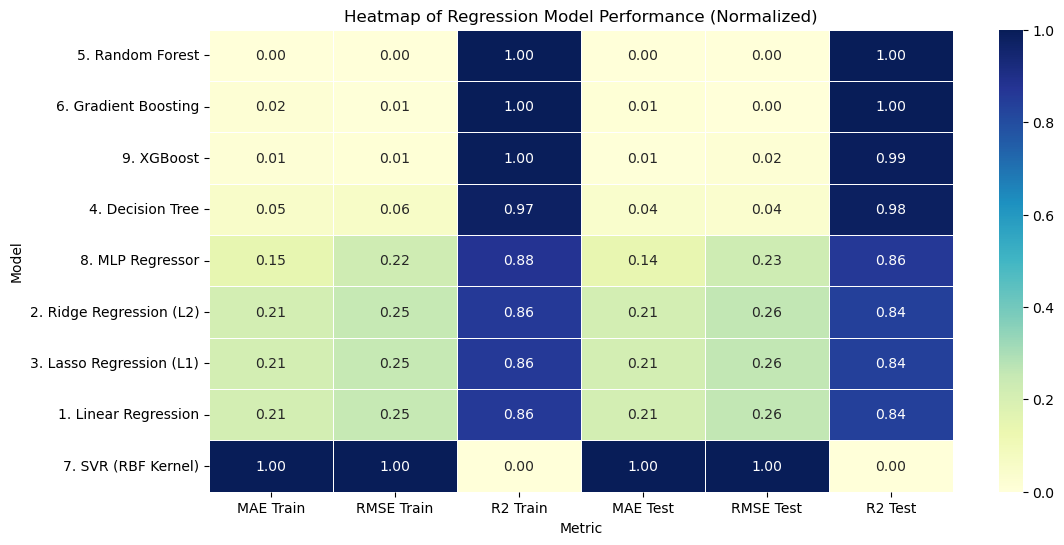

In [263]:

# Normalize metrics for better comparison 
results_normalized = results_supervised_df.copy()
for col in results_normalized.columns:
    results_normalized[col] = (results_normalized[col] - results_normalized[col].min()) / (results_normalized[col].max() - results_normalized[col].min())

plt.figure(figsize=(12, 6))
sns.heatmap(results_normalized, annot=True, cmap="YlGnBu", linewidths=0.5, fmt=".2f")
plt.title("Heatmap of Regression Model Performance (Normalized)")
plt.ylabel("Model")
plt.xlabel("Metric")
plt.show()


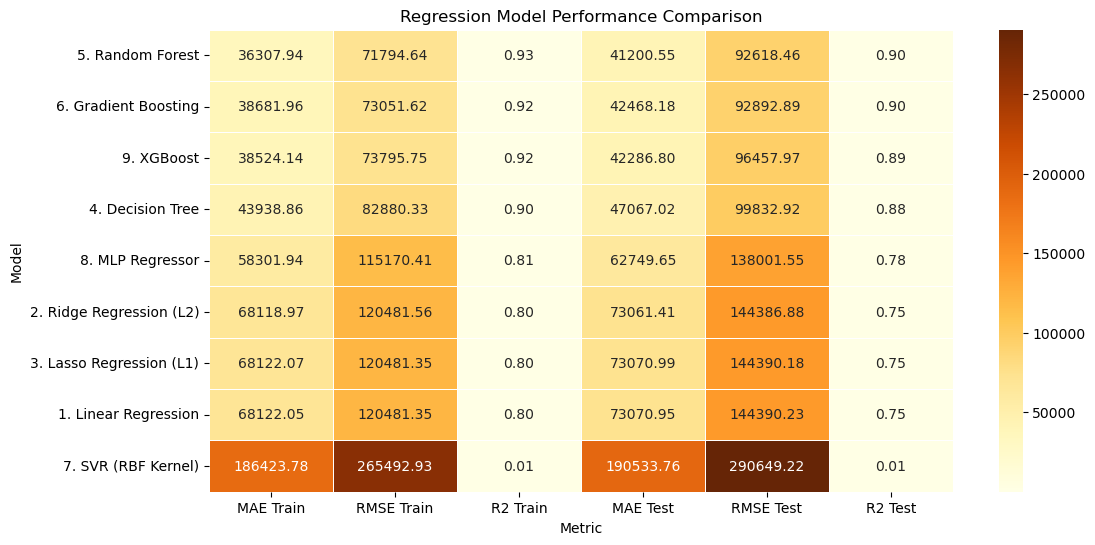

In [264]:
final_feature_names = X_train_processed.columns  # if it's a DataFrame


# Regrssion Model Performance Comparison
plt.figure(figsize=(12, 6))
sns.heatmap(results_supervised_df, annot=True, cmap="YlOrBr", fmt=".2f", linewidths=0.5)
plt.title("Regression Model Performance Comparison")
plt.ylabel("Model")
plt.xlabel("Metric")
plt.show()


## Checking the Our Model on the New Data

In [266]:
house_cleaned.head()

,Size,Size_unit,Property_type,Location,Seller_type,Rent_price,Area_sqft,Status,Bathroom,Facing_direction
0,2.0,BHK,Independent Floor,Uttam Nagar,Verified Owner,8500.0,500.0,Semi-Furnished,1.0,NorthWest
1,3.0,BHK,Independent House,Model Town,Verified Owner,48000.0,1020.0,Furnished,3.0,South
2,2.0,BHK,Apartment,Sector 13 Rohini,Verified Owner,20000.0,810.0,Unfurnished,2.0,Unknown
3,3.0,BHK,Apartment,DLF Farms,Verified Owner,11000.0,750.0,Semi-Furnished,1.0,Unknown
4,3.0,BHK,Independent Floor,laxmi nagar,Verified Owner,20000.0,1300.0,Furnished,2.0,Unknown


In [315]:
# Step 1: Capture user inputs
user_input = {
    'Size': int(input("Enter your House Size Here: ")),
    'Area_sqft': int(input("Enter your House Area (in sqft): ")),
    'Seller_type' :input("Enter Your Seller Type : "),
    'Size_unit' :input("Enter Your Size Unit : "),
    'Bathroom': int(input("Enter Number of Bathrooms: ")),
    'Location': input("Enter your Location: "),
    'Property_type': input("Enter Property Type (e.g. Apartment, Villa): "),
    'Status': input("Enter Furnishing Status (Furnished, Semi-Furnished, Unfurnished): "),
    'Facing_direction': input("Enter Facing Direction (e.g. East, West): ")
}

# Step 2: Convert to DataFrame
input_df = pd.DataFrame([user_input])

Enter your House Size Here:  2
Enter your House Area (in sqft):  580
Enter Your Seller Type :  Owner
Enter Your Size Unit :  BHK
Enter Number of Bathrooms:  1
Enter your Location:  Dwarka Mor
Enter Property Type (e.g. Apartment, Villa):  Apartment
Enter Furnishing Status (Furnished, Semi-Furnished, Unfurnished):  Unfurnished
Enter Facing Direction (e.g. East, West):  Unknown


In [317]:

# input_dict={'Property_type':'Apartment', 'Seller_type':'Agent', 'Size_unit':'RK','Status':'Unfurnished','Facing_direction':'East','Size' :1,'Bathroom':1,'Area_sqft':100,'Location':'Lajpat Nagar' }
input_df = pd.DataFrame([user_input])

input_df = input_df[X.columns]

input_df_processed = input_df.copy()

input_df_processed = loc_encoder.transform(input_df_processed) 

input_ohe_features = ohe.transform(input_df_processed[ohe_categorical_features])
input_ohe_df = pd.DataFrame(input_ohe_features, columns=ohe_feature_names, index=input_df_processed.index)

input_df_processed.drop(columns=ohe_categorical_features, inplace=True)
input_df_processed = pd.concat([input_df_processed, input_ohe_df], axis=1)

input_df_processed[numerical_features_to_scale] = scaler.transform(input_df_processed[numerical_features_to_scale])




print("\nProcessed input data for prediction:")
print(input_df_processed)
print(f"Shape of processed input: {input_df_processed.shape}")


Processed input data for prediction:
       Size  Location  Area_sqft  Bathroom  Property_type_Apartment  \
0 -0.957773 -1.002791  -1.125118 -1.781753                      1.0   

   Property_type_Independent Floor  Property_type_Independent House  \
0                              0.0                              0.0   

   Property_type_Penthouse  Property_type_Studio Apartment  \
0                      0.0                             0.0   

   Property_type_Villa  ...  Status_Unfurnished  Facing_direction_East  \
0                  0.0  ...                 1.0                    0.0   

   Facing_direction_North  Facing_direction_NorthEast  \
0                     0.0                         0.0   

   Facing_direction_NorthWest  Facing_direction_South  \
0                         0.0                     0.0   

   Facing_direction_SouthEast  Facing_direction_SouthWest  \
0                         0.0                         0.0   

   Facing_direction_Unknown  Facing_direction_Wes

In [319]:

# Select Model and Predict
print("\nAvailable models:")
for i, model_name in enumerate(trained_supervised_models.keys()):
    print(f" {model_name}")

while True:
    try:
        choice = int(input(f"Select a model by number (1-{len(trained_supervised_models)}): "))
        if 1 <= choice <= len(trained_supervised_models):
            selected_model_name = list(trained_supervised_models.keys())[choice-1]
            break
        else:
            print("Invalid choice. Please enter a number from the list.")
    except ValueError:
        print("Invalid input. Please enter a number.")

selected_model = trained_supervised_models[selected_model_name]
print(f"\nUsing model: {selected_model_name}")

prediction = selected_model.predict(input_df_processed)



print("Pridicting The Rent Price on your Inputs :")

print(f"\nPredicted Rent Price: {prediction[0]:.2f}")


Available models:
 1. Linear Regression
 2. Ridge Regression (L2)
 3. Lasso Regression (L1)
 4. Decision Tree
 5. Random Forest
 6. Gradient Boosting
 7. SVR (RBF Kernel)
 8. MLP Regressor
 9. XGBoost


Select a model by number (1-9):  5



Using model: 5. Random Forest
Pridicting The Rent Price on your Inputs :

Predicted Rent Price: 11653.00


In [321]:
input_df

,Size,Size_unit,Property_type,Location,Seller_type,Area_sqft,Status,Bathroom,Facing_direction
0,2,BHK,Apartment,Dwarka Mor,Owner,580,Unfurnished,1,Unknown


In [323]:
house_cleaned.shape

(13996, 10)